In [23]:

import numpy as np
import random
import matplotlib.pyplot as plt
import networkx as nx

In [24]:
def graph_creation_1(n,M,k,clusters_size,prob_list,prob_list_prime):
  if(len(clusters_size)!=k or prob_list.shape !=(k,M) or prob_list_prime.shape !=(k,k,M)):
    print("Error in cluster creation ")
    return 0

  index_cluster = []
  for i in range(k):
    index_cluster += clusters_size[i]*[i]
  index_cluster = np.array(index_cluster)

  res = np.zeros((n,n,M))
  for i in range(M):
    for j in range(n):
      for k in range(j):
        if(index_cluster[j]==index_cluster[k]):
          res[j,k,i] = 1 if random.random() < prob_list[index_cluster[j],i] else 0
        else:
          res[j,k,i] = 1 if random.random() < prob_list_prime[index_cluster[j],index_cluster[k],i] else 0
        res[k,j,i] = res[j,k,i]
        #je suis sur ma branche
  return res,index_cluster

[]

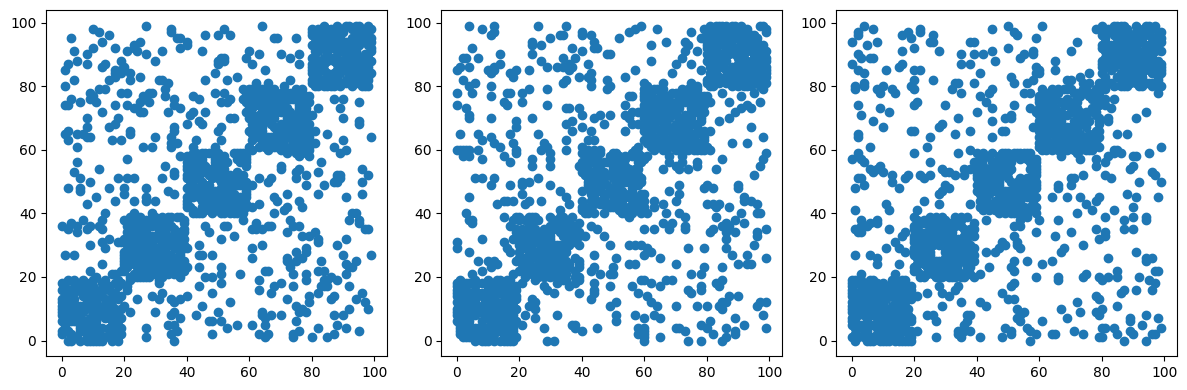

In [25]:
n = 100
M = 3
k = 5

prob = np.full((k,M),0.5)
prob_prime = np.full((k,k,M),0.05)
clusters_size = k*[20]

matrix,index_cluster = graph_creation_1(n,M,k,clusters_size,prob,prob_prime)


fig, axs = plt.subplots(1, M, figsize=(12, 4))  # 1 row, 3 columns, total figure size is (15, 5) inches

for i in range(M):
  x,y = np.where(matrix[:,:,i] == 1)
  axs[i].scatter(x,y)

plt.tight_layout()
plt.plot()




[]

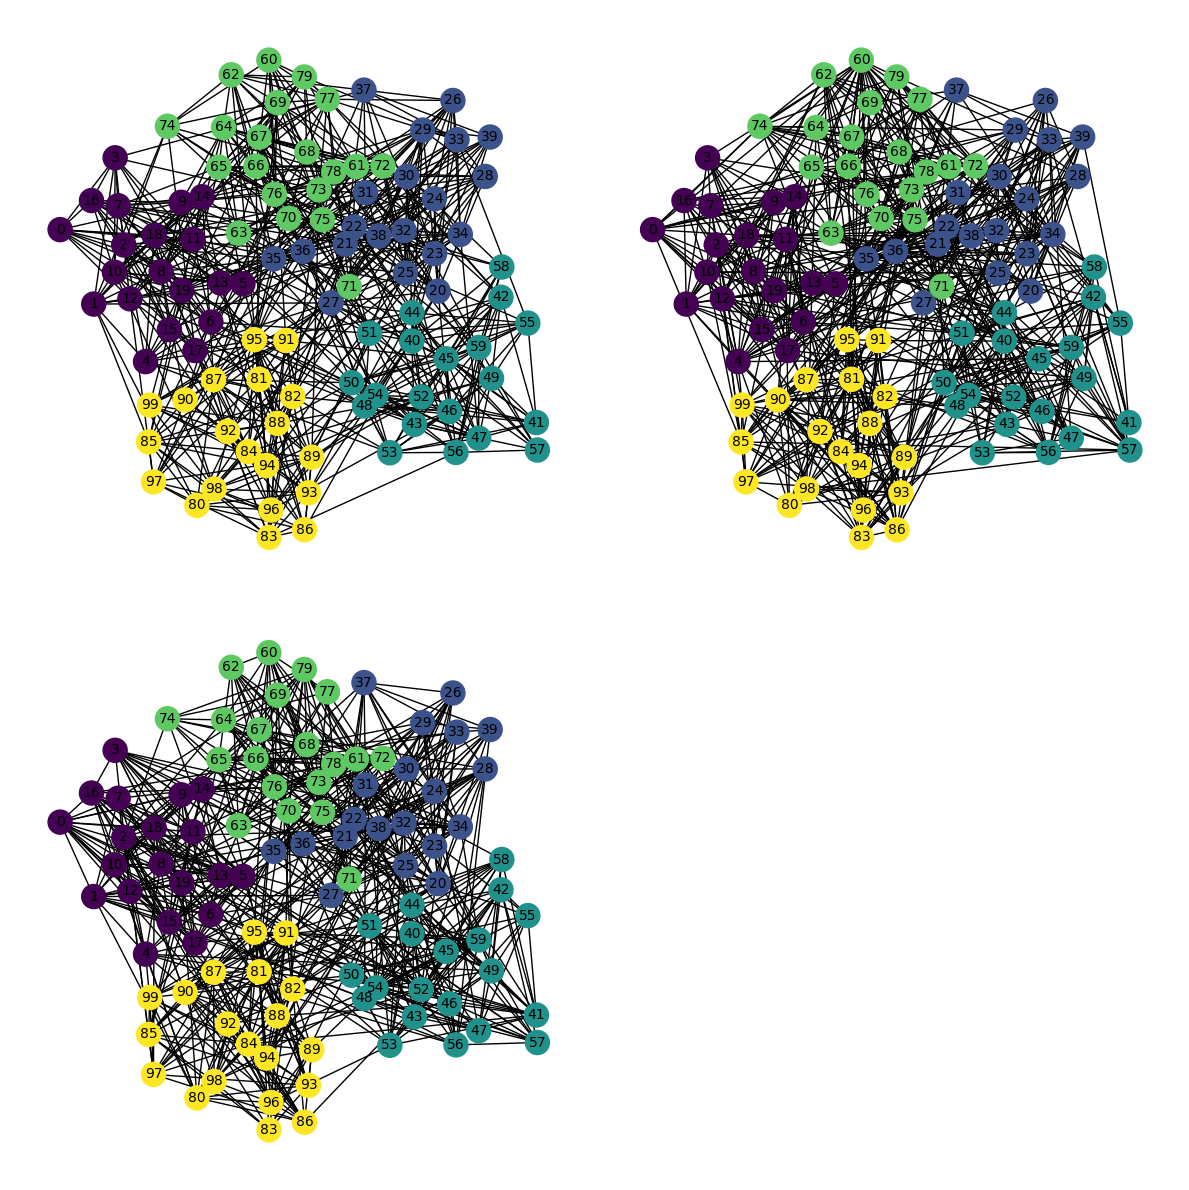

In [26]:
fig, axs = plt.subplots(2, 1+M//2, figsize=(12, 12))  # 1 row, 3 columns, total figure size is (15, 5) inches


G = nx.Graph()
list_nodes = [i for i in range(n)]
G.add_nodes_from(list_nodes)

for i in range(n):
  for j in range(i+1,n):
    if(matrix[i,j,0] == 1):
      G.add_edge(list_nodes[i],list_nodes[j])


node_colors = index_cluster
clusters = index_cluster


pos = nx.spring_layout(G)
nx.draw(G, pos,ax=axs[0,0], with_labels=True, node_size=300, node_color=node_colors, font_size=10, font_color="black")
for p in range(1,M):
  G = nx.Graph()
  G.add_nodes_from(list_nodes)

  for i in range(n):
    for j in range(i+1,n):
      if(matrix[i,j,p] == 1):
        G.add_edge(list_nodes[i],list_nodes[j])



  nx.draw(G, pos,ax=axs[p//2,p%2], with_labels=True, node_size=300, node_color=node_colors, font_size=10, font_color="black")


axs[1, 1].axis('off')
plt.tight_layout()
plt.plot()